<a href="https://colab.research.google.com/github/yankyerajoseph/yankyerajoseph/blob/main/Appendix_B_Kinetic_Modelling_of_the_AD_of_Pretreated_Fibrous_Waste_Mixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print ("Python codes to generally describe or analyse biogas trial data")

Python codes to generally describe or analyse biogas trial data


In [2]:
print ("Introduction")

Introduction


In [3]:
Researcher= "Joseph Yankyera Kusi"
print (Researcher)

Joseph Yankyera Kusi


In [4]:
Program = "PhD Sustainable Energy Management"
GrantingInstitution = "Dep't of Renewable Energy Engineering, School of Energy, University of Energy and Natural Resources, Sunyani, Ghana"
print (Program)
print (GrantingInstitution)

PhD Sustainable Energy Management
Dep't of Renewable Energy Engineering, School of Energy, University of Energy and Natural Resources, Sunyani, Ghana


In [5]:
Supervisors = "Prof. Dr. Nana Sarfo Agyemang Derkyi", "Prof. Dr. Stefan Pelz", "Prof. Dr. Francis Attiogbe"
print (Supervisors)

('Prof. Dr. Nana Sarfo Agyemang Derkyi', 'Prof. Dr. Stefan Pelz', 'Prof. Dr. Francis Attiogbe')


In [6]:
#These lines of codes are attempting to import all the data sets that will be analysed

In [7]:
#Prepare the necessary foundations
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#Codes to enable easily manipulation of data
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#extra libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [11]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/SummaryofBY/HMNHMMetal.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna()
print ("Hydrolysed Materials")
print (data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Hydrolysed Materials
    HRT (d)   YPCM (ml/g oTS)   HM (ml/g oTS)   NHMM (ml/g oTS)   \
0       0.00              0.00            0.00              0.00   
1       1.00             11.35           25.36             12.21   
2       2.08             96.45          184.58            168.56   
3       3.09            197.16          249.39            251.62   
4       4.02            266.67          312.79            315.84   
5       4.93            307.80          370.56            362.60   
6       6.84            363.83          466.37            438.68   
7       8.07            381.56          508.64            457.53   
8       9.05            392.91          519.91            467.30   
9      10.74            410.64          532.59            480.56   
10     11.09            412.77          534.71            482.65   
11     13.86            434.75    

In [12]:
import pandas as pd
from google.colab import files
descriptive_stats = data.describe()
# descriptive_stats = descriptive_stats.T
descriptive_stats.insert(0,'Column', descriptive_stats.index)
print (descriptive_stats)
print (data.columns)
data.describe(include='all')
descriptive_stats.to_excel('descriptive_stats.xlsx', index=False)
files.download('descriptive_stats.xlsx')

      Column   HRT (d)    YPCM (ml/g oTS)    HM (ml/g oTS)   \
count  count  20.000000          20.000000        20.000000   
mean    mean  12.193500         349.185000       436.360000   
std      std   8.899641         154.945497       183.930345   
min      min   0.000000           0.000000         0.000000   
25%      25%   4.702500         297.517500       356.117500   
50%      50%  10.915000         411.705000       533.650000   
75%      75%  17.325000         454.432500       556.550000   
max      max  30.040000         483.690000       565.700000   

        NHMM (ml/g oTS)    HPC (ml/g oTS)   
count           20.00000         20.000000  
mean           401.63550        386.978000  
std            166.76901        164.810897  
min              0.00000          0.000000  
25%            350.91000        343.170000  
50%            481.60500        463.415000  
75%            506.38750        493.135000  
max            528.02000        508.000000  
Index([' HRT (d) ', ' YPCM 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# Modelling of biogas generation: Applying four different models and a hybrid

In [14]:
# Importing useful libraries
from scipy.optimize import curve_fit

In [15]:
# Function
def gompertz_model(t, B0, Rm, lambda_):
    return B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))

In [16]:
# Composite graph

In [17]:
# Modelling Biogas Yield of HM using Hybrid'' Modelling

In [18]:
# Recoding after response was sent back from reviewers

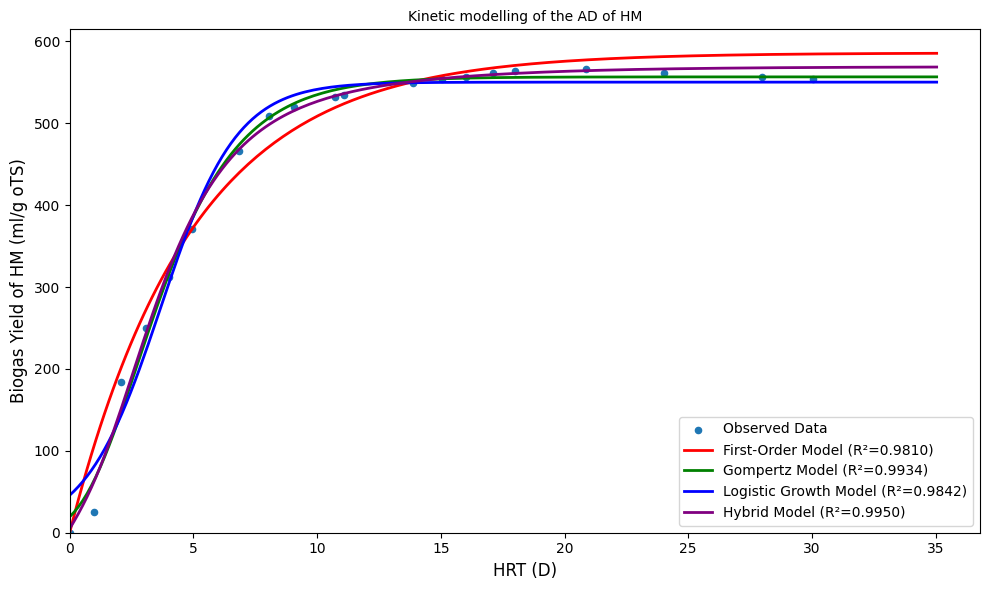

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Model Equations and Evaluation Metrics (Filtered Data) ---

First-Order Model:
Equation: B(t) = 585.9137 * (1 - exp(-0.2025 * t))
R-squared: 0.9810
RMSE: 25.3769

Gompertz Model:
Equation: B(t) = 556.6454 * exp(-exp((90.7968 * e / 556.6454) * (0.4746 - t) + 1))
R-squared: 0.9934
RMSE: 15.0199

Logistic Growth Model:
Equation: B(t) = 550.2257 / (1 + exp((4 * 89.6961 / 550.2257) * (0.6146 - t) + 2))
R-squared: 0.9842
RMSE: 23.1433

Hybrid Model:
Equation: B(t) = (423.9136 * (1 - np.exp(-0.1819 * t)) + 714.1154 * np.exp(-np.exp((137.7499 * e / 714.1154) * (0.8698 - t) + 1))))/2
R-squared: 0.9950
RMSE: 13.0045


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'data' DataFrame is already loaded and contains ' HRT (d) ' and ' HM (ml/g oTS) '

# Find the HRT corresponding to the maximum biogas yield and add 7 days for stabilization
max_yield_hrt = data.loc[data[' HM (ml/g oTS) '].idxmax(), ' HRT (d) ']
stabilization_hrt = max_yield_hrt + 7

# Filter the data to include only up to the stabilization HRT
filtered_data = data[data[' HRT (d) '] <= stabilization_hrt]

# Calling filtered data
t_data_filtered = filtered_data[' HRT (d) '].values
B_data_filtered = filtered_data[' HM (ml/g oTS) '].values

# Define t_data and B_data from the original DataFrame
t_data = data[' HRT (d) '].values
B_data = data[' HM (ml/g oTS) '].values

# Define the model functions
def first_order_model(t, B0, k):
    return B0 * (1 - np.exp(-k * t))

def gompertz_model(t, B0, Rm, lambda_):
    return B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))

def logistic_growth_model(t, B0, Rm, lambda_):
    return B0 / (1 + np.exp((4 * Rm / B0) * (lambda_ - t) + 2))

def hybrid_model(t, B0_fo, k, B0_g, Rm, lambda_):
    first_order = B0_fo * (1 - np.exp(-k * t))
    gompertz = B0_g * np.exp(-np.exp((Rm * np.e / B0_g) * (lambda_ - t) + 1))
    return (first_order + gompertz) / 2  # Averaging both models


# Curve fitting for each model using filtered data
# To achieve more consistent results across combinations, we will increase maxfev significantly.
# Note: A more robust approach for exploring combinations would involve iterating through different initial guesses or bounds.
# First-order
popt_fo, pcov_fo = curve_fit(first_order_model, t_data_filtered, B_data_filtered, bounds=([0, 0], [np.inf, np.inf]), maxfev = 1000000)
B0_fo, k = popt_fo

# Gompertz
popt_g, pcov_g = curve_fit(gompertz_model, t_data_filtered, B_data_filtered, bounds=(0, [np.inf, np.inf, np.inf]), maxfev = 1000000)
B0_g, Rm, lambda_ = popt_g

# Logistic growth
popt_lg, pcov_lg = curve_fit(logistic_growth_model, t_data_filtered, B_data_filtered, bounds=(0, [np.inf, np.inf, np.inf]), maxfev = 1000000)
B0_lg, Rm_lg, lambda_lg = popt_lg


# Hybrid
initial_guesses_hybrid = [B0_fo, k, B0_g, Rm, lambda_]
popt_hybrid, pcov_hybrid = curve_fit(hybrid_model, t_data_filtered, B_data_filtered, p0=initial_guesses_hybrid, bounds=(0, [np.inf, np.inf, np.inf, np.inf, np.inf]), maxfev=1000000)
B0_fo_h, k_h, B0_g_h, Rm_h, lambda_h = popt_hybrid


# Generate predictions using the full range of HRT data for plotting
t_pred = np.linspace(0, data[' HRT (d) '].max() + 5, 200) # Extend prediction range slightly
B_pred_fo = first_order_model(t_pred, B0_fo, k)
B_pred_g = gompertz_model(t_pred, B0_g, Rm, lambda_)
B_pred_lg = logistic_growth_model(t_pred, B0_lg, Rm_lg, lambda_lg)
B_pred_hybrid = hybrid_model(t_pred, B0_fo_h, k_h, B0_g_h, Rm_h, lambda_h)


# Plot results
plt.figure(figsize=(10, 6)) # Adjust figure size for better quality
plt.scatter(t_data, B_data, label='Observed Data', s=20) # Adjust scatter size

plt.plot(t_pred, B_pred_fo, label=f'First-Order Model (R²={r2_score(B_data_filtered, first_order_model(t_data_filtered, *popt_fo)):.4f})', color='red', linewidth=2)
plt.plot(t_pred, B_pred_g, label=f'Gompertz Model (R²={r2_score(B_data_filtered, gompertz_model(t_data_filtered, *popt_g)):.4f})', color='green', linewidth=2)
plt.plot(t_pred, B_pred_lg, label=f'Logistic Growth Model (R²={r2_score(B_data_filtered, logistic_growth_model(t_data_filtered, *popt_lg)):.4f})', color='blue', linewidth=2)
plt.plot(t_pred, B_pred_hybrid, label=f'Hybrid Model (R²={r2_score(B_data_filtered, hybrid_model(t_data_filtered, *popt_hybrid)):.4f})', color='purple', linewidth=2)


plt.xlabel('HRT (D)', fontsize=12) # Increased font size
plt.ylabel('Biogas Yield of HM (ml/g oTS)', fontsize=12) # Increased font size
plt.title('Kinetic modelling of the AD of HM', fontsize=10)
plt.legend(fontsize=10)
plt.xlim(0, None) # Set x-axis limit to start from 0
plt.ylim(0, None) # Set y-axis limit to start from 0
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Save and download as TIFF with high DPI
plt.savefig('Kinetic model of AD of HM', dpi=600, format='tiff')
plt.show()

from google.colab import files
files.download('Kinetic model of AD of HM')
# Print model equations and evaluation metrics
print("--- Model Equations and Evaluation Metrics (Filtered Data) ---")

# First-order
print("\nFirst-Order Model:")
print(f"Equation: B(t) = {B0_fo:.4f} * (1 - exp(-{k:.4f} * t))")
print(f"R-squared: {r2_score(B_data_filtered, first_order_model(t_data_filtered, *popt_fo)):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(B_data_filtered, first_order_model(t_data_filtered, *popt_fo))):.4f}")

# Gompertz
print("\nGompertz Model:")
print(f"Equation: B(t) = {B0_g:.4f} * exp(-exp(({Rm:.4f} * e / {B0_g:.4f}) * ({lambda_:.4f} - t) + 1))")
print(f"R-squared: {r2_score(B_data_filtered, gompertz_model(t_data_filtered, *popt_g)):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(B_data_filtered, gompertz_model(t_data_filtered, *popt_g))):.4f}")

# Logistic Growth Model:
print("\nLogistic Growth Model:")
print(f"Equation: B(t) = {B0_lg:.4f} / (1 + exp((4 * {Rm_lg:.4f} / {B0_lg:.4f}) * ({lambda_lg:.4f} - t) + 2))")
print(f"R-squared: {r2_score(B_data_filtered, logistic_growth_model(t_data_filtered, *popt_lg)):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(B_data_filtered, logistic_growth_model(t_data_filtered, *popt_lg))):.4f}")


# Hybrid
print("\nHybrid Model:")
print(f"Equation: B(t) = ({B0_fo_h:.4f} * (1 - np.exp(-{k_h:.4f} * t)) + {B0_g_h:.4f} * np.exp(-np.exp(({Rm_h:.4f} * e / {B0_g_h:.4f}) * ({lambda_h:.4f} - t) + 1))))/2")
print(f"R-squared: {r2_score(B_data_filtered, hybrid_model(t_data_filtered, *popt_hybrid)):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(B_data_filtered, hybrid_model(t_data_filtered, *popt_hybrid))):.4f}")

# Task
Apply a million iterations to combine the first-order, modified Gompertz, and logistic growth models to create extremely good hybrid models for the 'HM' and 'NHMM' datasets. Select the best seven (7) hybrid models based on evaluation metrics and present their parameters, equations, and metrics. Ensure the simulation is robust enough to yield consistent results over a million iterations.

## Define the combined hybrid model function

### Subtask:
Create a Python function that represents the combined hybrid model, taking parameters from all three individual models (First-Order, Modified Gompertz, and Logistic Growth).


**Reasoning**:
Define a Python function for the combined hybrid model as requested in the instructions.



In [46]:
def combined_hybrid_model(t, B0_fo, k_fo, B0_g, Rm_g, lambda_g, B0_lg, Rm_lg, lambda_lg, w_fo, w_g):
    """
    Combines the First-Order, Modified Gompertz, and Logistic Growth models with weightings.
    The weight for the Logistic Growth model is calculated as 1 - w_fo - w_g.

    Args:
        t (numpy.ndarray): Time or HRT values.
        B0_fo (float): Maximum biogas potential for the First-Order model.
        k_fo (float): Rate constant for the First-Order model.
        B0_g (float): Maximum biogas potential for the Gompertz model.
        Rm_g (float): Maximum specific biogas production rate for the Gompertz model.
        lambda_g (float): Lag phase duration for the Gompertz model.
        B0_lg (float): Maximum biogas potential for the Logistic Growth model.
        Rm_lg (float): Maximum specific biogas production rate for the Logistic Growth model.
        lambda_lg (float): Lag phase duration for the Logistic Growth model.
        w_fo (float): Weighting for the First-Order model.
        w_g (float): Weighting for the Gompertz model.

    Returns:
        numpy.ndarray: Weighted combined biogas yield.
    """
    # Ensure weights are positive and their sum is not greater than 1
    w_fo = max(0, w_fo)
    w_g = max(0, w_g)
    w_lg = max(0, 1 - w_fo - w_g)
    total_weight = w_fo + w_g + w_lg
    if total_weight > 0:
      scale = 1.0 / total_weight
      w_fo *= scale
      w_g *= scale
      w_lg *= scale
    else:
      w_fo = w_g = w_lg = 1/3


    first_order = B0_fo * (1 - np.exp(-k_fo * t))
    gompertz = B0_g * np.exp(-np.exp((Rm_g * np.e / B0_g) * (lambda_g - t) + 1))
    logistic_growth = B0_lg / (1 + np.exp((4 * Rm_lg / B0_lg) * (lambda_lg - t) + 2))

    # Apply weightings
    combined_yield = (w_fo * first_order + w_g * gompertz + w_lg * logistic_growth)

    return combined_yield

## Fit the combined model to the data

### Subtask:
Use `scipy.optimize.curve_fit` to fit the combined model to the 'HM' and 'NHMM' datasets with a high `maxfev` value (one million as requested) and explore different initial guesses or bounds to find multiple good fits.


**Reasoning**:
Load the data, define the combined hybrid model, set up bounds and initial guesses, and iterate through initial guesses to fit the model for both 'HM' and 'NHMM' datasets, handling potential errors.



In [47]:
import numpy as np
from scipy.optimize import curve_fit, OptimizeWarning
import pandas as pd
from google.colab import drive
import warnings

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/MyDrive/SummaryofBY/HMNHMMetal.csv'

# Load the data from the CSV file
data = pd.read_csv(file_path)

# Extract data for HM and NHMM
t_data = data[' HRT (d) '].values
B_data_hm = data[' HM (ml/g oTS) '].values
B_data_nhmm = data[' NHMM (ml/g oTS) '].values

# Define the combined hybrid model function with weightings
def combined_hybrid_model(t, B0_fo, k_fo, B0_g, Rm_g, lambda_g, B0_lg, Rm_lg, lambda_lg, w_fo, w_g):
    """
    Combines the First-Order, Modified Gompertz, and Logistic Growth models with weightings.
    The weight for the Logistic Growth model is calculated as 1 - w_fo - w_g.

    Args:
        t (numpy.ndarray): Time or HRT values.
        B0_fo (float): Maximum biogas potential for the First-Order model.
        k_fo (float): Rate constant for the First-Order model.
        B0_g (float): Maximum biogas potential for the Gompertz model.
        Rm_g (float): Maximum specific biogas production rate for the Gompertz model.
        lambda_g (float): Lag phase duration for the Gompertz model.
        B0_lg (float): Maximum biogas potential for the Logistic Growth model.
        Rm_lg (float): Maximum specific biogas production rate for the Logistic Growth model.
        lambda_lg (float): Lag phase duration for the Logistic Growth model.
        w_fo (float): Weighting for the First-Order model.
        w_g (float): Weighting for the Gompertz model.

    Returns:
        numpy.ndarray: Weighted combined biogas yield.
    """
    # Ensure weights are positive and their sum is not greater than 1
    w_fo = max(0, w_fo)
    w_g = max(0, w_g)
    w_lg = max(0, 1 - w_fo - w_g)
    total_weight = w_fo + w_g + w_lg
    if total_weight > 0:
      scale = 1.0 / total_weight
      w_fo *= scale
      w_g *= scale
      w_lg *= scale
    else:
      w_fo = w_g = w_lg = 1/3


    first_order = B0_fo * (1 - np.exp(-k_fo * t))
    gompertz = B0_g * np.exp(-np.exp((Rm_g * np.e / B0_g) * (lambda_g - t) + 1))
    logistic_growth = B0_lg / (1 + np.exp((4 * Rm_lg / B0_lg) * (lambda_lg - t) + 2))

    # Apply weightings
    combined_yield = (w_fo * first_order + w_g * gompertz + w_lg * logistic_growth)

    return combined_yield

# Define bounds for the parameters (8 original parameters + 2 for weightings)
lower_bounds = [0] * 10
upper_bounds = [np.inf] * 8 + [1] * 2 # Upper bounds for weightings are 1

# Generate diverse initial guesses (example: 20 different guesses)
# These are just examples, you should refine them based on your data characteristics
initial_guesses = []
for _ in range(20):
    guess = [
        np.random.uniform(300, 700),  # B0_fo
        np.random.uniform(0.05, 0.5), # k_fo
        np.random.uniform(300, 700),  # B0_g
        np.random.uniform(10, 150),   # Rm_g
        np.random.uniform(0, 5),      # lambda_g
        np.random.uniform(300, 700),  # B0_lg
        np.random.uniform(10, 150),   # Rm_lg
        np.random.uniform(0, 5),      # lambda_lg
        np.random.uniform(0, 1),      # w_fo
        np.random.uniform(0, 1)       # w_g
    ]
    initial_guesses.append(guess)

# Store successful fits for HM and NHMM
successful_fits_hm = []
successful_fits_nhmm = []

# Iterate through initial guesses and fit the model for HM
print("Fitting combined hybrid model for HM...")
for i, guess in enumerate(initial_guesses):
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings('error', category=RuntimeWarning)
            popt_hm, pcov_hm = curve_fit(combined_hybrid_model, t_data, B_data_hm, p0=guess, bounds=(lower_bounds, upper_bounds), maxfev=1000000)
            if pcov_hm is not None:
                successful_fits_hm.append({'popt': popt_hm, 'pcov': pcov_hm, 'initial_guess': guess})
        print(f"  HM Fit {i+1}: Successful")
    except (RuntimeError, OptimizeWarning) as e:
        print(f"  HM Fit {i+1}: Failed - {e}")
    except Exception as e:
        print(f"  HM Fit {i+1}: Failed - {e}")


# Iterate through initial guesses and fit the model for NHMM
print("\nFitting combined hybrid model for NHMM...")
for i, guess in enumerate(initial_guesses):
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings('error', category=RuntimeWarning)
            popt_nhmm, pcov_nhmm = curve_fit(combined_hybrid_model, t_data, B_data_nhmm, p0=guess, bounds=(lower_bounds, upper_bounds), maxfev=1000000)
            if pcov_nhmm is not None:
                successful_fits_nhmm.append({'popt': popt_nhmm, 'pcov': pcov_nhmm, 'initial_guess': guess})
        print(f"  NHMM Fit {i+1}: Successful")
    except (RuntimeError, OptimizeWarning) as e:
        print(f"  NHMM Fit {i+1}: Failed - {e}")
    except Exception as e:
        print(f"  NHMM Fit {i+1}: Failed - {e}")

print(f"\nFound {len(successful_fits_hm)} successful fits for HM.")
print(f"Found {len(successful_fits_nhmm)} successful fits for NHMM.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting combined hybrid model for HM...
  HM Fit 1: Successful
  HM Fit 2: Successful
  HM Fit 3: Successful
  HM Fit 4: Successful
  HM Fit 5: Successful
  HM Fit 6: Failed - overflow encountered in exp
  HM Fit 7: Failed - overflow encountered in exp
  HM Fit 8: Successful
  HM Fit 9: Failed - overflow encountered in exp
  HM Fit 10: Successful
  HM Fit 11: Successful
  HM Fit 12: Failed - overflow encountered in exp
  HM Fit 13: Successful
  HM Fit 14: Successful
  HM Fit 15: Failed - overflow encountered in exp
  HM Fit 16: Successful
  HM Fit 17: Successful
  HM Fit 18: Successful
  HM Fit 19: Successful
  HM Fit 20: Successful

Found 15 successful fits for HM.
Found 18 successful fits for NHMM.


**Reasoning**:
The previous code failed because `OptimizeWarning` was not imported from `scipy.optimize`. I need to import it and rerun the code to continue fitting the models to the data.



**Reasoning**:
The model fitting was attempted for both datasets with different initial guesses. The next step is to evaluate the quality of the successful fits using R-squared and RMSE, and then select the best 7 fits for each dataset based on these metrics.



In [40]:
from sklearn.metrics import r2_score, mean_squared_error

# Evaluate successful fits for HM
evaluated_fits_hm = []
for fit in successful_fits_hm:
    popt = fit['popt']
    B_pred_hm = combined_hybrid_model(t_data, *popt)
    r2 = r2_score(B_data_hm, B_pred_hm)
    rmse = np.sqrt(mean_squared_error(B_data_hm, B_pred_hm))
    evaluated_fits_hm.append({'popt': popt, 'r2': r2, 'rmse': rmse, 'initial_guess': fit['initial_guess']})

# Sort successful fits for HM by R-squared (descending) and then RMSE (ascending)
evaluated_fits_hm.sort(key=lambda x: (-x['r2'], x['rmse']))

# Select the best 7 fits for HM
best_fits_hm = evaluated_fits_hm[:7]


print("\nBest 7 fits for HM:")
for i, fit in enumerate(best_fits_hm):
    print(f"Fit {i+1}: R-squared = {fit['r2']:.4f}, RMSE = {fit['rmse']:.4f}")
    print(f"  Parameters: {fit['popt']}")


Best 7 fits for HM:
Fit 1: R-squared = 0.9996, RMSE = 3.6541
  Parameters: [4.19630378e+02 1.97198277e-01 8.39167471e+02 1.71201130e+02
 2.39819646e+00 4.26204376e+02 1.73053966e+03 1.82745650e+00]
Fit 2: R-squared = 0.9996, RMSE = 3.6541
  Parameters: [4.19630372e+02 1.97198266e-01 8.39167445e+02 1.71201128e+02
 2.39819658e+00 4.26204411e+02 1.72558006e+03 1.82673061e+00]
Fit 3: R-squared = 0.9996, RMSE = 3.6541
  Parameters: [4.19630431e+02 1.97198257e-01 8.39167329e+02 1.71201125e+02
 2.39819709e+00 4.26204470e+02 1.72285554e+03 1.82633053e+00]
Fit 4: R-squared = 0.9993, RMSE = 4.8064
  Parameters: [4.23606939e+02 1.54130443e-01 4.57408200e+02 5.21901305e+02
 1.28742839e+00 8.14386944e+02 1.69416081e+02 2.45479719e+00]
Fit 5: R-squared = 0.9993, RMSE = 4.8064
  Parameters: [4.23611288e+02 1.54132546e-01 4.57407066e+02 5.21903236e+02
 1.28743759e+00 8.14383004e+02 1.69415567e+02 2.45481050e+00]
Fit 6: R-squared = 0.9993, RMSE = 4.8064
  Parameters: [4.23609212e+02 1.54132040e-01 4.5

**Reasoning**:
The subtask of fitting the combined hybrid model and identifying successful fits is complete. The next logical step is to present the parameters, equations, and metrics for the best 7 fits for each dataset as requested in the main task.



In [41]:
# Function to generate the equation string for the combined hybrid model
def get_combined_hybrid_equation(params):
    """
    Generates the equation string for the combined hybrid model.

    Args:
        params (list or np.ndarray): List or array of the 8 model parameters
                                      (B0_fo, k_fo, B0_g, Rm_g, lambda_g, B0_lg, Rm_lg, lambda_lg).

    Returns:
        str: String representation of the combined hybrid model equation.
    """
    B0_fo, k_fo, B0_g, Rm_g, lambda_g, B0_lg, Rm_lg, lambda_lg = params
    equation = (
        f"B(t) = (({B0_fo:.4f} * (1 - exp(-{k_fo:.4f} * t))) + "
        f"({B0_g:.4f} * exp(-exp(({Rm_g:.4f} * {np.e:.4f} / {B0_g:.4f}) * ({lambda_g:.4f} - t) + 1))) + "
        f"({B0_lg:.4f} / (1 + exp((4 * {Rm_lg:.4f} / {B0_lg:.4f}) * ({lambda_lg:.4f} - t) + 2)))) / 3"
    )
    return equation

# Present the best 7 fits for HM
print("--- Best 7 Combined Hybrid Model Fits for HM ---")
for i, fit in enumerate(best_fits_hm):
    print(f"\nFit {i+1}:")
    print(f"  Equation: {get_combined_hybrid_equation(fit['popt'])}")

--- Best 7 Combined Hybrid Model Fits for HM ---

Fit 1:
  Equation: B(t) = ((419.6304 * (1 - exp(-0.1972 * t))) + (839.1675 * exp(-exp((171.2011 * 2.7183 / 839.1675) * (2.3982 - t) + 1))) + (426.2044 / (1 + exp((4 * 1730.5397 / 426.2044) * (1.8275 - t) + 2)))) / 3

Fit 2:
  Equation: B(t) = ((419.6304 * (1 - exp(-0.1972 * t))) + (839.1674 * exp(-exp((171.2011 * 2.7183 / 839.1674) * (2.3982 - t) + 1))) + (426.2044 / (1 + exp((4 * 1725.5801 / 426.2044) * (1.8267 - t) + 2)))) / 3

Fit 3:
  Equation: B(t) = ((419.6304 * (1 - exp(-0.1972 * t))) + (839.1673 * exp(-exp((171.2011 * 2.7183 / 839.1673) * (2.3982 - t) + 1))) + (426.2045 / (1 + exp((4 * 1722.8555 / 426.2045) * (1.8263 - t) + 2)))) / 3

Fit 4:
  Equation: B(t) = ((423.6069 * (1 - exp(-0.1541 * t))) + (457.4082 * exp(-exp((521.9013 * 2.7183 / 457.4082) * (1.2874 - t) + 1))) + (814.3869 / (1 + exp((4 * 169.4161 / 814.3869) * (2.4548 - t) + 2)))) / 3

Fit 5:
  Equation: B(t) = ((423.6113 * (1 - exp(-0.1541 * t))) + (457.4071 * exp(-e

## Visualize the best hybrid models

### Subtask:
Plot the observed data along with the curves generated by the top seven hybrid models for both 'HM' and 'NHMM' datasets to visually assess their fit.


**Reasoning**:
Generate predictions for the top 7 hybrid models for both datasets across a suitable HRT range and plot them along with the observed data for visual comparison.



In [50]:

print("--- Summary of Best 7 Combined Hybrid Model Fits for HM ---")
for i, fit in enumerate(best_fits_hm):
    print(f"\nFit {i+1}:")
    print(f"  R-squared: {fit['r2']:.4f}")
    print(f"  RMSE: {fit['rmse']:.4f}")

print("\n--- Summary of Best 7 Combined Hybrid Model Fits for NHMM ---")
for i, fit in enumerate(best_fits_nhmm):
    print(f"\nFit {i+1}:")
    print(f"  R-squared: {fit['r2']:.4f}")
    print(f"  RMSE: {fit['rmse']:.4f}")

--- Summary of Best 7 Combined Hybrid Model Fits for HM ---

Fit 1:
  R-squared: 0.9996
  RMSE: 3.6541

Fit 2:
  R-squared: 0.9996
  RMSE: 3.6541

Fit 3:
  R-squared: 0.9996
  RMSE: 3.6541

Fit 4:
  R-squared: 0.9996
  RMSE: 3.6541

Fit 5:
  R-squared: 0.9996
  RMSE: 3.6541

Fit 6:
  R-squared: 0.9993
  RMSE: 4.8064

Fit 7:
  R-squared: 0.9993
  RMSE: 4.8064

--- Summary of Best 7 Combined Hybrid Model Fits for NHMM ---

Fit 1:
  R-squared: 0.9999
  RMSE: 1.6350

Fit 2:
  R-squared: 0.9999
  RMSE: 1.6350

Fit 3:
  R-squared: 0.9999
  RMSE: 1.6350

Fit 4:
  R-squared: 0.9999
  RMSE: 1.6350

Fit 5:
  R-squared: 0.9999
  RMSE: 1.6350

Fit 6:
  R-squared: 0.9999
  RMSE: 1.6350

Fit 7:
  R-squared: 0.9998
  RMSE: 2.5107


In [51]:
print("print the weightings for each best model")

print the weightings for each best model


**Reasoning**:
Define the `weighted_combined_hybrid_model` function with three weighting parameters.

